# Part 1: Data Cleaning and Manipulation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Read in the two csv files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [28]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Look into training set data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# Look into testing set data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [16]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [3]:
# Remove Survival column in training set and then combine train and 
# test data sets for easier data clean up
surv = train['Survived']
train = train.drop(['Survived'], axis = 1)
full = pd.concat([train, test], axis = 0)

In [36]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


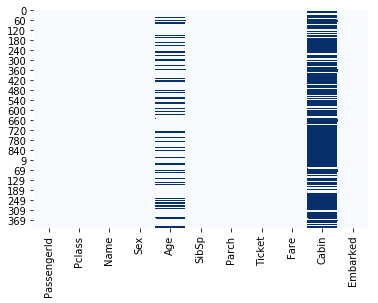

In [4]:
# Heatmap to visualize the amount of nulls there are in each column
sns.heatmap(full.isnull(), cbar = False, cmap = "Blues")

In [4]:
# For age I am intending to impute the average age based on Pclass, and Sex
# Going to take a look at the average age for each combination of those two column values
full.groupby(by=['Pclass', 'Sex'])['Age'].mean()

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

In [5]:
# Impute ages based on the values in the grouped list
grouped = [round(num, 1) for num in list(full.groupby(by=['Pclass', 'Sex'])['Age'].mean())]
full.loc[(full['Age'].isnull()) & (full['Pclass'] == 1) & (full['Sex'] == 'female'), 'Age'] = grouped[0]
full.loc[(full['Age'].isnull()) & (full['Pclass'] == 1) & (full['Sex'] == 'male'), 'Age'] = grouped[1]
full.loc[(full['Age'].isnull()) & (full['Pclass'] == 2) & (full['Sex'] == 'female'), 'Age'] = grouped[2]
full.loc[(full['Age'].isnull()) & (full['Pclass'] == 2) & (full['Sex'] == 'male'), 'Age'] = grouped[3]
full.loc[(full['Age'].isnull()) & (full['Pclass'] == 3) & (full['Sex'] == 'female'), 'Age'] = grouped[4]
full.loc[(full['Age'].isnull()) & (full['Pclass'] == 3) & (full['Sex'] == 'male'), 'Age'] = grouped[5]

In [53]:
# Now it is time to impute Fare and Embarked and remove Cabin or try something else later
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null object
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 162.7+ KB


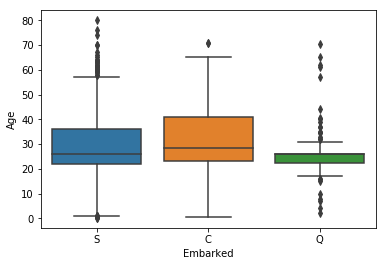

In [39]:
sns.boxplot(x='Embarked', y='Age', data=full)

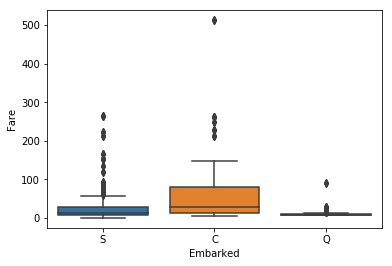

In [40]:
sns.boxplot(x='Embarked', y='Fare', data=full)

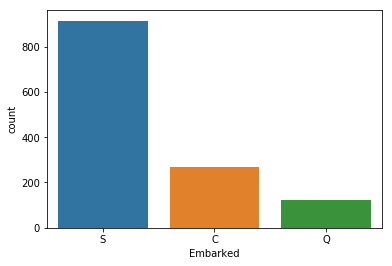

In [41]:
sns.countplot(x='Embarked', data=full)

In [6]:
# After looking at boxplots and countplots it seems like I will impute Embarked with S
full.loc[(full['Embarked'].isnull()), 'Embarked'] = 'S'

In [7]:
# Because there is only one null for Fare I will look into the specific line of data
full.loc[(full['Fare'].isnull())]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [8]:
# Then I will take a look at Age and Class and see mean Fare and use the combo from the line
full.groupby(by=['Pclass', 'Sex'])['Fare'].mean()

Pclass  Sex   
1       female    109.412385
        male       69.888385
2       female     23.234827
        male       19.904946
3       female     15.324250
        male       12.415462
Name: Fare, dtype: float64

In [9]:
# Impute for the lone missing value in the Fare column
full.loc[(full['Fare'].isnull()), 'Fare'] = 12.4

In [10]:
# Remove the Cabin column
full = full.drop('Cabin', axis = 1)
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Embarked       1309 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 112.5+ KB


In [11]:
# Then split the values back into training and test dataframes
train = full.iloc[:891, :]
test = full.iloc[891:, :]

# Part 2: Model Building

In [15]:
# For training the model we can split up the training set into a training and validation set
# Then we can use scikit learn to help with the random sampling
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(train, surv, train_size=0.7,test_size=0.3, random_state=101)

In [12]:
# Time to use random forest as our first machine learning algorithm to predict survival
from sklearn.ensemble import RandomForestClassifier

C:\Users\yesla\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train,y_train)


In [ ]:
# This is code to do hyper paramter tuning for random forest regression


from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegessor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)
